M. Nivetha
215229126

## LAB - 4 HOUSE PRICE PREDICTION USING LR WITH REGULARIZATION

#### STEP 1 : IMPORT DATASET.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Ames_House_Sales_cropped.csv')

In [3]:
df.head()

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [4]:
df.shape

(1379, 39)

In [5]:
df.size

53781

In [6]:
df.columns

Index(['BldgType', 'CentralAir', '1stFlrSF', '2ndFlrSF', '3SsnPorch',
       'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
df.dtypes

BldgType          object
CentralAir        object
1stFlrSF         float64
2ndFlrSF         float64
3SsnPorch        float64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtUnfSF        float64
EnclosedPorch    float64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars         int64
GarageYrBlt      float64
GrLivArea        float64
HalfBath           int64
KitchenAbvGr       int64
LotArea          float64
LotFrontage      float64
LowQualFinSF     float64
MSSubClass         int64
MasVnrArea       float64
MiscVal          float64
MoSold             int64
OpenPorchSF      float64
OverallCond        int64
OverallQual        int64
PoolArea         float64
ScreenPorch      float64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
SalePrice        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 39 columns):
BldgType         1379 non-null object
CentralAir       1379 non-null object
1stFlrSF         1379 non-null float64
2ndFlrSF         1379 non-null float64
3SsnPorch        1379 non-null float64
BedroomAbvGr     1379 non-null int64
BsmtFinSF1       1379 non-null float64
BsmtFinSF2       1379 non-null float64
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
BsmtUnfSF        1379 non-null float64
EnclosedPorch    1379 non-null float64
Fireplaces       1379 non-null int64
FullBath         1379 non-null int64
GarageArea       1379 non-null float64
GarageCars       1379 non-null int64
GarageYrBlt      1379 non-null float64
GrLivArea        1379 non-null float64
HalfBath         1379 non-null int64
KitchenAbvGr     1379 non-null int64
LotArea          1379 non-null float64
LotFrontage      1379 non-null float64
LowQualFinSF     1379 non-null float64
MSSubClass    

In [9]:
df['YearBuilt'].value_counts()

2006    66
2005    64
2004    53
2007    48
2003    45
1976    33
1977    31
1999    25
1920    25
1998    25
2000    24
1959    24
2002    23
1958    23
1965    23
2008    23
1954    23
1968    21
1970    21
1972    21
2001    20
1957    20
1950    20
1962    19
2009    18
1971    18
1966    18
1995    18
1994    18
1993    17
        ..
1880     4
1985     4
1938     4
1929     4
1983     4
1991     4
1935     4
1932     4
1934     3
1989     3
1914     3
1947     3
1927     3
1987     2
1942     2
1919     2
1885     2
1908     2
1890     2
1892     2
1882     1
1898     1
1893     1
1913     1
1904     1
1905     1
1906     1
1912     1
1917     1
2010     1
Name: YearBuilt, Length: 109, dtype: int64

In [10]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


In [11]:
df.ndim

2

#### STEP 2 : PREDICT SALE PRICE WITHOUT CATEGORICAL FEATURES

In [45]:
df1 = df.drop(['CentralAir','BldgType'],axis=1)


In [46]:
df1

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,1,732.0,0.0,1,0,64.0,0.0,...,5,0.0,0.0,5,796.0,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,3,1369.0,0.0,1,0,317.0,0.0,...,8,0.0,0.0,7,1686.0,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,3,859.0,32.0,1,0,216.0,228.0,...,7,0.0,0.0,7,1107.0,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,2,0.0,0.0,0,0,952.0,205.0,...,7,0.0,0.0,8,952.0,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,2,851.0,0.0,1,0,140.0,0.0,...,5,0.0,0.0,5,991.0,0.0,1939,1950,2008,118000.0


In [55]:
X=df1.drop(["SalePrice"],axis=1)
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
5,796.0,566.0,320.0,1,732.0,0.0,1,0,64.0,0.0,...,5,5,0.0,0.0,5,796.0,40.0,1993,1995,2009
6,1694.0,0.0,0.0,3,1369.0,0.0,1,0,317.0,0.0,...,5,8,0.0,0.0,7,1686.0,255.0,2004,2005,2007
7,1107.0,983.0,0.0,3,859.0,32.0,1,0,216.0,228.0,...,6,7,0.0,0.0,7,1107.0,235.0,1973,1973,2009
8,1022.0,752.0,0.0,2,0.0,0.0,0,0,952.0,205.0,...,5,7,0.0,0.0,8,952.0,90.0,1931,1950,2008
9,1077.0,0.0,0.0,2,851.0,0.0,1,0,140.0,0.0,...,6,5,0.0,0.0,5,991.0,0.0,1939,1950,2008


In [56]:
y= df1[['SalePrice']].values

In [57]:
y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

#### STEP 4: CREATE SCATTER PLOT 

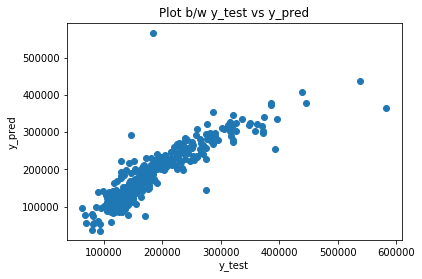

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Plot b/w y_test vs y_pred")
plt.show()

#### STEP 5: PREDICT SALE PRICE WITH CATEGORICAL VALUES 

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
y_pred=reg.predict(X_test)
y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [64]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)

print("MSE without Categorical: ",mse)

MSE without Categorical:  1474827325.5975406


In [66]:
g_dummies=pd.get_dummies(df)
g_dummies

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd,YrSold,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2008,208500.0,1,0,0,0,0,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,2007,181500.0,1,0,0,0,0,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2002,2008,223500.0,1,0,0,0,0,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1970,2006,140000.0,1,0,0,0,0,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2008,250000.0,1,0,0,0,0,0,1
5,796.0,566.0,320.0,1,732.0,0.0,1,0,64.0,0.0,...,1995,2009,143000.0,1,0,0,0,0,0,1
6,1694.0,0.0,0.0,3,1369.0,0.0,1,0,317.0,0.0,...,2005,2007,307000.0,1,0,0,0,0,0,1
7,1107.0,983.0,0.0,3,859.0,32.0,1,0,216.0,228.0,...,1973,2009,200000.0,1,0,0,0,0,0,1
8,1022.0,752.0,0.0,2,0.0,0.0,0,0,952.0,205.0,...,1950,2008,129900.0,1,0,0,0,0,0,1
9,1077.0,0.0,0.0,2,851.0,0.0,1,0,140.0,0.0,...,1950,2008,118000.0,0,1,0,0,0,0,1


In [26]:
# another ways
df2 = pd.get_dummies(df, columns=['CentralAir','BldgType'], drop_first=False)
df2

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd,YrSold,SalePrice,CentralAir_N,CentralAir_Y,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2008,208500.0,0,1,1,0,0,0,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,2007,181500.0,0,1,1,0,0,0,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2002,2008,223500.0,0,1,1,0,0,0,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1970,2006,140000.0,0,1,1,0,0,0,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2008,250000.0,0,1,1,0,0,0,0
5,796.0,566.0,320.0,1,732.0,0.0,1,0,64.0,0.0,...,1995,2009,143000.0,0,1,1,0,0,0,0
6,1694.0,0.0,0.0,3,1369.0,0.0,1,0,317.0,0.0,...,2005,2007,307000.0,0,1,1,0,0,0,0
7,1107.0,983.0,0.0,3,859.0,32.0,1,0,216.0,228.0,...,1973,2009,200000.0,0,1,1,0,0,0,0
8,1022.0,752.0,0.0,2,0.0,0.0,0,0,952.0,205.0,...,1950,2008,129900.0,0,1,1,0,0,0,0
9,1077.0,0.0,0.0,2,851.0,0.0,1,0,140.0,0.0,...,1950,2008,118000.0,0,1,0,1,0,0,0


In [67]:
X1 = get_dummies.drop(['SalePrice'],axis=1)
X1

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2003,2008,1,0,0,0,0,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,1976,2007,1,0,0,0,0,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2001,2002,2008,1,0,0,0,0,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1915,1970,2006,1,0,0,0,0,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2000,2008,1,0,0,0,0,0,1
5,796.0,566.0,320.0,1,732.0,0.0,1,0,64.0,0.0,...,1993,1995,2009,1,0,0,0,0,0,1
6,1694.0,0.0,0.0,3,1369.0,0.0,1,0,317.0,0.0,...,2004,2005,2007,1,0,0,0,0,0,1
7,1107.0,983.0,0.0,3,859.0,32.0,1,0,216.0,228.0,...,1973,1973,2009,1,0,0,0,0,0,1
8,1022.0,752.0,0.0,2,0.0,0.0,0,0,952.0,205.0,...,1931,1950,2008,1,0,0,0,0,0,1
9,1077.0,0.0,0.0,2,851.0,0.0,1,0,140.0,0.0,...,1939,1950,2008,0,1,0,0,0,0,1


In [68]:
y=df2[['SalePrice']].values
y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [69]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


LR = LinearRegression() 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42 )
                                                    


In [70]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
y_pred = LR.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error
predictions = LR.predict(X_test) 
mse = mean_squared_error(y_test, predictions) 
mse

1461036570.1436336

### STEP 6 : NORMALIZE USING STANDARD SCALER AND PREDICT SALE PRICE

In [73]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

In [74]:
X_train_ss=ss.fit_transform(X_train)
X_train_ss 

array([[ 0.39851037, -0.79290427, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619],
       [ 1.57467708, -0.79290427, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [ 0.37564751,  0.70143387, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       ...,
       [ 1.22157303, -0.79290427, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-1.11297817,  0.90510323, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [ 0.11145456, -0.79290427, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619]])

In [75]:

X_test_ss = ss.transform(X_test)
X_test_ss


array([[ 0.85830772, -0.79290427, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619],
       [-0.64810018, -0.79290427, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-0.21624632,  0.76093278, -0.11340519, ..., -0.2895815 ,
         4.39027446, -4.39027446],
       ...,
       [-0.04350477,  0.37647826, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-0.64301955,  1.46805451, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-0.29499614,  0.81585486, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619]])

In [76]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train_ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
y_pred_ss=LR.predict(X_test_ss)
y_pred_ss

array([[257746.67634751],
       [113257.14215097],
       [ 83086.83449793],
       [204109.44696503],
       [209062.51895279],
       [ 69091.78945845],
       [235181.17333175],
       [205722.26326666],
       [187627.82768487],
       [234276.07879635],
       [101443.5208025 ],
       [304189.5355825 ],
       [102111.08803612],
       [289185.34424259],
       [204499.21833429],
       [142096.29751997],
       [249636.03306251],
       [147881.8828702 ],
       [210574.13858086],
       [277457.62922997],
       [ 91416.02948336],
       [153937.03347396],
       [160626.96732406],
       [243147.94924865],
       [372541.07042985],
       [219861.59417986],
       [116849.37194182],
       [100880.38852652],
       [318604.3072889 ],
       [168091.93524469],
       [258085.96044038],
       [201316.99711925],
       [154599.59088249],
       [142746.1064703 ],
       [205138.6701111 ],
       [382254.53304499],
       [124930.2956851 ],
       [141597.13070899],
       [2736

In [100]:
from sklearn.metrics import mean_squared_error

ss_mse=mean_squared_error(y_test,y_pred_ss)

print("MSE with Categorical: ",ss_mse)

MSE with Categorical:  1461036570.1437433


#### STEP 7 : NORMALIZE USING MINMAX SCALER AND PREDICT SALE PRICE

In [80]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [81]:
X_train_mm = min_max.fit_transform(X_train)
X_test_mm = min_max.transform(X_test)

In [82]:
LR_MM = LinearRegression()
LR_MM.fit(X_train_mm,y_train)
y_pred_mm= LR_MM.predict(X_test_mm)
y_pred_mm

array([[257746.67634751],
       [113257.14215097],
       [ 83086.83449793],
       [204109.44696503],
       [209062.51895279],
       [ 69091.78945845],
       [235181.17333175],
       [205722.26326666],
       [187627.82768487],
       [234276.07879635],
       [101443.5208025 ],
       [304189.5355825 ],
       [102111.08803612],
       [289185.34424259],
       [204499.21833429],
       [142096.29751997],
       [249636.03306251],
       [147881.8828702 ],
       [210574.13858086],
       [277457.62922997],
       [ 91416.02948336],
       [153937.03347396],
       [160626.96732406],
       [243147.94924865],
       [372541.07042985],
       [219861.59417986],
       [116849.37194182],
       [100880.38852652],
       [318604.3072889 ],
       [168091.93524469],
       [258085.96044038],
       [201316.99711925],
       [154599.59088249],
       [142746.1064703 ],
       [205138.6701111 ],
       [382254.53304499],
       [124930.2956851 ],
       [141597.13070899],
       [2736

In [83]:
mm_mse=metrics.mean_squared_error(y_test,y_pred_mm)
mm_r2=metrics.r2_score(y_test,y_pred_mm)
print("MM_MSE: ",mm_mse)

MM_MSE:  1461036570.1437414


#### STEP 8 : PREDICT USING SGD REGRESSOR

In [95]:
from sklearn.linear_model import SGDRegressor
LR_SGD = SGDRegressor()

In [96]:
LR_SGD.fit(X_train_ss,y_train)
y_pred_sgd = LR_SGD.predict(X_test_ss)
y_pred_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([256800.28342809, 101386.69447515,  95418.84522489, 205743.81146538,
       209844.81548192,  68585.90088353, 237552.70117493, 203078.86687622,
       188423.38789141, 227508.84028464,  94452.16412955, 301398.52985168,
       100820.7625631 , 296324.3426759 , 206247.62760307, 146735.85814681,
       246060.77711127, 151938.00908444, 213158.21382462, 278691.46629501,
        93570.47965645, 154913.49855704, 165880.97884309, 243492.53503559,
       377804.20103115, 220032.41939767, 119211.82040509,  92997.62089648,
       330289.56446179, 174109.9479784 , 253807.25801086, 195873.32510462,
       140724.45366273, 135942.31440853, 208127.76068444, 384592.23485026,
       114237.56538723, 139238.41153696, 271860.58588735, 209445.80241445,
       172461.31158618, 119506.19329905, 191127.56121835, 378987.92006531,
       152346.55882781, 294430.47060486,  98992.09587263, 221529.72293718,
        83293.197498  , 301716.60820465, 117493.85179322,  45620.12051402,
       140902.21779973, 1

In [97]:
sgd_mse=metrics.mean_squared_error(y_test, y_pred_sgd)
sgd_r2=metrics.r2_score(y_test, y_pred_sgd)
print("SGD_MSE:",sgd_mse)

SGD_MSE: 1458940237.0677214


#### STEP 8 : PREDICT USING LASSO REGRESSOR

In [89]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_ss, y_train)
lasso_y_pred=lasso.predict(X_test_ss)
lasso_y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([257729.69686228, 113247.68204486,  83142.29454527, 204106.43998851,
       209066.49021888,  69054.81228022, 235176.11930442, 205711.84838767,
       187608.59515698, 234284.06084395, 101449.25460271, 304193.6360213 ,
       102109.0711376 , 289198.43257911, 204491.12189758, 142122.85239194,
       249633.03850946, 147889.3873303 , 210566.82234788, 277458.74148889,
        91422.16023407, 153936.54170005, 160629.24135716, 243131.57205681,
       372542.62040315, 219872.31056047, 116863.87010022, 100885.24049767,
       318608.68254302, 168098.13679091, 258090.97848895, 201288.31490053,
       154603.02948577, 142756.31460187, 205137.22911272, 382237.47687556,
       124919.66167664, 141572.72803651, 273666.16449995, 214125.2076817 ,
       170460.20631671, 124565.97224865, 197629.92077736, 376132.94977617,
       148005.53413165, 288031.84338491, 108663.12260663, 218568.08286906,
        88451.65003835, 295193.48660115, 125792.5796616 ,  54906.97302469,
       133434.7793381 , 1

In [91]:
lasso_mse=metrics.mean_squared_error(y_test, y_pred_sgd)
lasso_r2=metrics.r2_score(y_test, lasso_y_pred)
print("LASSO_MSE:",lasso_mse)

LASSO_MSE: 1618432237.0442379


#### STEP 8: PREDICT USING RIDGE REGRESSOR

In [101]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train_ss,y_train)
pred = ridge.predict(X_test_ss)
pred

array([[254535.15583953],
       [109387.89394743],
       [105163.11719425],
       [203459.66115094],
       [207780.32984933],
       [ 61482.11483873],
       [233514.96913869],
       [205448.16641238],
       [184659.70084125],
       [225198.016095  ],
       [102326.39477891],
       [291256.9709761 ],
       [108411.61152131],
       [289444.03743503],
       [206292.29548987],
       [148972.3737889 ],
       [243620.36901801],
       [150619.44300157],
       [211430.54126895],
       [272365.49343623],
       [100405.74364332],
       [156417.73510259],
       [162952.58271167],
       [235924.49548143],
       [367898.46218248],
       [219496.95347392],
       [123801.13590327],
       [101559.16787392],
       [317001.19645446],
       [170429.75709357],
       [257479.18568295],
       [193223.74076003],
       [148453.0631305 ],
       [138357.12788333],
       [204088.32119215],
       [368505.78450232],
       [115916.69775347],
       [131636.569884  ],
       [2682

In [102]:
ridge_mse=metrics.mean_squared_error(y_test, y_pred_sgd)

print("RIDGE_MSE:",ridge_mse)

RIDGE_MSE: 1458940237.0677214


In [110]:
import numpy as np


print("RMSE without CD: ",np.sqrt(mse))


print("RMSE with CD: ",np.sqrt(mse_cd))


print("RMSE with CD and SS: ",np.sqrt(ss_mse))


print("RMSE with CD and MnMaxScaling: ",np.sqrt(mm_mse))


print("RMSE of SGDRegressor with CD and StandardScaler: ",np.sqrt(sgd_mse))


print("RMSE of Ridge with CD and Standard Scaler: ",np.sqrt(ridge_mse))


print("RMSE of Lasso with CD and StandardScaler",np.sqrt(lasso_mse))

RMSE without CD:  38223.50808263985
RMSE with CD:  38223.50808263985
RMSE with CD and SS:  38223.50808264128
RMSE with CD and MnMaxScaling:  38223.50808264125
RMSE of SGDRegressor with CD and StandardScaler:  38196.07619988893
RMSE of Ridge with CD and Standard Scaler:  38196.07619988893
RMSE of Lasso with CD and StandardScaler 40229.74318889244
